# 1 Questions 

# Q5

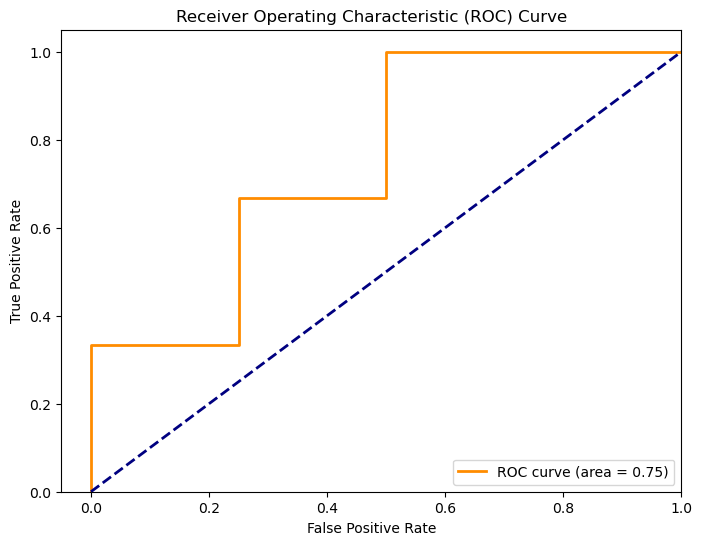

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
pfolder = '/Users/zexuansun/Desktop/CS\ 760/hw3_pic/'
# Example data (replace with your own data)
y_true = np.array([1, 1, 0, 1, 1, 0, 1, 1, 0,0 ])
y_scores = np.array([0.95,0.85, 0.8,0.7,0.55,0.45,0.4,0.3,0.2,0.1])

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('/Users/zexuansun/Desktop/CS760/hw3_pic/q5.png',dpi = 200)
plt.show()


# 2 Programming

#  Q1

In [28]:
import numpy as np
from scipy import stats as st
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2,axis = 1))

    def predict(self, X,prob = False):
        # for x in X[:1]:
        #     print(x)
        n = X.shape[0]
        y_pred = [self._predict(X[i,:],prob = prob) for i in range(n)]
        return np.array(y_pred)

    def _predict(self, x,prob = False):
        # Compute distances from x to all data points in the training set
        # if self.k == 1:
        # else:
        if prob:
            distances = self.euclidean_distance(x, self.X_train) 
            k_indices = np.argsort(distances)[:self.k]
            
            # Extract the labels of the k nearest neighbor training samples
            k_nearest_labels = np.array([self.y_train[i] for i in k_indices],dtype = np.int16)
            n_p = np.sum(k_nearest_labels==1)
            return n_p / len(k_nearest_labels)

        else:
            distances = self.euclidean_distance(x, self.X_train) 
            
            # Sort by distance and return indices of the first k neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Extract the labels of the k nearest neighbor training samples
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            # Return the most common class label
            #most_common = st.mode(k_nearest_labels)
            most_common = np.bincount(k_nearest_labels).argmax()
            return most_common

# Example usage:
if __name__ == "__main__":
    # Create a toy dataset
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y_train = np.array([0, 0, 1, 1])
    X_test = np.array([[2, 2], [3, 3]])

    # Create a KNN classifier with k=2
    knn = KNNClassifier(k=2)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Predict the labels for the test data
    predictions = knn.predict(X_test)
    
    print("Predicted labels:", predictions)


Predicted labels: [0 0]


In [7]:
#training_set = read_file('D2z.txt')
import pandas as pd

data = np.loadtxt('/Users/zexuansun/Downloads/hw3Data/D2z.txt')


test_set = []
for i in np.arange(-2,2.1,0.1):
    for j in np.arange(-2,2.1,0.1):
        test_set.append([i,j])
test_set = pd.DataFrame(test_set).reset_index(drop=True)
test_set.columns = ("x0","x1")

In [25]:
test_set.values

array([[-2. , -2. ],
       [-2. , -1.9],
       [-2. , -1.8],
       ...,
       [ 2. ,  1.8],
       [ 2. ,  1.9],
       [ 2. ,  2. ]])

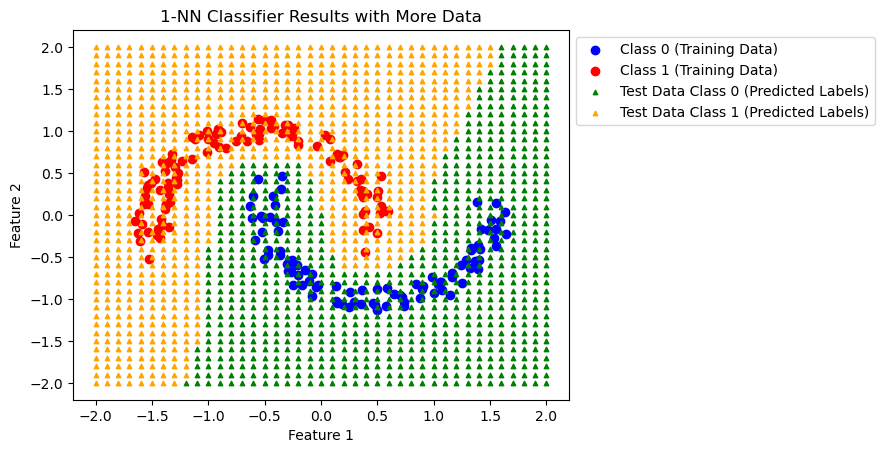

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create a larger toy train dataset
X_train =data[:,0:2]
y_train = data[:,2]

# Create a larger toy test dataset
X_test = test_set.values

# Create a KNN classifier with k=1
knn = KNNClassifier(k=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
predictions = knn.predict(X_test)

# Define colors for the classes (e.g., class 0 in blue, class 1 in red)
colors = ['b' if label == 0 else 'r' for label in y_train]

# Create a scatter plot for the training data with a legend
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='Class 0 (Training Data)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='o', label='Class 1 (Training Data)')
label = predictions
# Create a scatter plot for the test data with predicted labels and a legend
plt.scatter(X_test[label == 0][:, 0], X_test[label == 0][:, 1], c='g', marker='^', s=10, label='Test Data Class 0 (Predicted Labels)')
plt.scatter(X_test[label == 1][:, 0], X_test[label == 1][:, 1], c='orange', marker='^', s=10, label='Test Data Class 1 (Predicted Labels)')


plt.legend(['Class 0 (Train)', 'Class 1 (Train)', 'Class 0 (Predicted)', 'Class 1 (Predicted)'])

# Move the legend outside the figure using bbox_to_anchor
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('1-NN Classifier Results with More Data')
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('/Users/zexuansun/Desktop/CS760/hw3_pic/q1.png',dpi = 200,bbox_inches='tight')
plt.show()


# Q2

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score


data = pd.read_csv('/Users/zexuansun/Downloads/hw3Data/emails.csv',index_col=0)
X = data.values[:,1:-1]
y = data.values[:,-1]
X = np.array(X,dtype=np.float32)
y = np.array(y,dtype = np.int16)
# Define the number of folds
num_folds = 5
fold_size = len(X) // num_folds

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
inds = np.arange(0,5000)
# Perform 5-fold cross-validation
for fold in range(num_folds):
    # Split the dataset into training and test sets
    test_indices = range(fold * fold_size, (fold + 1) * fold_size)
    train_indices = np.delete(inds,test_indices)

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    print('done')
    # Create a 1NN classifier
    knn = KNNClassifier(k=1)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    print('done')
    # Predict labels on the test data
    y_pred = knn.predict(X_test)
    print('done')
    # Calculate evaluation metrics for the fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Print the metrics for the current fold
    print(f"Fold {fold + 1}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")

# Calculate and print the average metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

print("\nAverage Metrics Across All Folds:")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")


done
done
done
Fold 1: Accuracy=0.82, Precision=0.65, Recall=0.82
done
done
done
Fold 2: Accuracy=0.85, Precision=0.69, Recall=0.87
done
done
done
Fold 3: Accuracy=0.86, Precision=0.72, Recall=0.84
done
done
done
Fold 4: Accuracy=0.85, Precision=0.72, Recall=0.82
done
done
done
Fold 5: Accuracy=0.78, Precision=0.61, Recall=0.76

Average Metrics Across All Folds:
Average Accuracy: 0.83
Average Precision: 0.68
Average Recall: 0.82


# Q3

In [23]:
import numpy as np

import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score



warnings.filterwarnings('ignore')


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = np.random.normal(-1.5,1,1)

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Gradient calculation
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            sumd = np.sqrt((np.sum(dw*dw) + db*db)/num_features)
            #print(sumd)
            if sumd < 1e-3:
                break
            # print(dw)
            # print(db)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X,threshold = 0.5,prob = False):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > threshold else 0 for i in y_pred]
        if prob:
            return y_pred_class,y_pred
        else:
            return y_pred_class


In [31]:
import pandas as pd
data = pd.read_csv('/Users/zexuansun/Downloads/hw3Data/emails.csv',index_col=0)
X = data.values[:,1:-1]
y = data.values[:,-1]
X = np.array(X,dtype=np.float32)
y = np.array(y,dtype = np.int16)
# Define the number of folds
num_folds = 5
fold_size = len(X) // num_folds

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
inds = np.arange(0,5000)
# Perform 5-fold cross-validation
for fold in range(num_folds):
    # Split the dataset into training and test sets
    test_indices = range(fold * fold_size, (fold + 1) * fold_size)
    train_indices = np.delete(inds,test_indices)

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    print('done')
    # Create a 1NN classifier
    lr = LogisticRegression(learning_rate=0.01/4, num_iterations=1500)


    # Fit the classifier to the training data
    lr.fit(X_train, y_train)
    print('done')
    # Predict labels on the test data
    y_pred = lr.predict(X_test)
    print('done')
    # Calculate evaluation metrics for the fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Print the metrics for the current fold
    print(f"Fold {fold + 1}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")

# Calculate and print the average metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)

print("\nAverage Metrics Across All Folds:")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")


done
done
done
Fold 1: Accuracy=0.89, Precision=0.87, Recall=0.71
done
done
done
Fold 2: Accuracy=0.90, Precision=0.89, Recall=0.71
done
done
done
Fold 3: Accuracy=0.74, Precision=0.52, Recall=0.88
done
done
done
Fold 4: Accuracy=0.89, Precision=0.92, Recall=0.67
done
done
done
Fold 5: Accuracy=0.84, Precision=0.86, Recall=0.59

Average Metrics Across All Folds:
Average Accuracy: 0.85
Average Precision: 0.81
Average Recall: 0.71


# Q4

1
done
done
done
done
done
done
done
done
done
done
3
done
done
done
done
done
done
done
done
done
done
5
done
done
done
done
done
done
done
done
done
done
7
done
done
done
done
done
done
done
done
done
done
10
done
done
done
done
done
done
done
done
done
done
k = 1: Average Accuracy = 0.8336
k = 3: Average Accuracy = 0.8412
k = 5: Average Accuracy = 0.8394
k = 7: Average Accuracy = 0.8454
k = 10: Average Accuracy = 0.8534


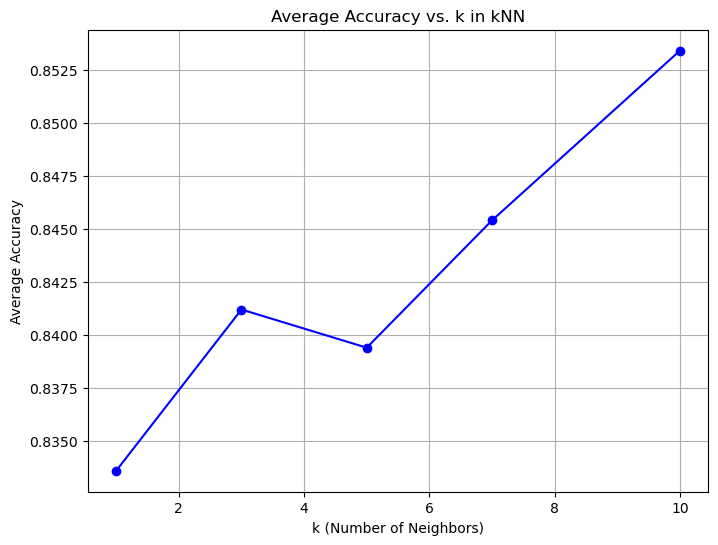

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

data =pd.read_csv('/Users/zexuansun/Downloads/hw3Data/emails.csv',index_col=0)
X = data.values[:,1:-1]
y = data.values[:,-1]
X = np.array(X,dtype=np.float32)
y = np.array(y,dtype = np.int16)



# Define the values of k to test
k_values = [1, 3, 5, 7, 10]

# Initialize lists to store average accuracy for each k
average_accuracies = []

# Create a KFold instance with 5 folds
num_folds = 5
#kf = KFold(n_splits=num_folds)

# Loop over different values of k
for k in k_values:
    fold_accuracies = []
    print(k)
    # Perform 5-fold cross-validation for the current k

    for fold in range(num_folds):
    # Split the dataset into training and test sets
        test_indices = range(fold * fold_size, (fold + 1) * fold_size)
        train_indices = np.delete(inds,test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        # Create a KNN classifier with the current k
        knn = KNNClassifier(k)

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
        print('done')

        # Predict labels on the test data
        y_pred = knn.predict(X_test)
        print('done')
        
        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

    avg_accuracy = np.mean(fold_accuracies)
    average_accuracies.append(avg_accuracy)

# Plot the average accuracy versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, average_accuracies, marker='o', linestyle='-', color='b')
plt.title('Average Accuracy vs. k in kNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)

# Print the average accuracy for each k
for i, k in enumerate(k_values):
    print(f'k = {k}: Average Accuracy = {average_accuracies[i]:.4f}')

plt.show()


k = 1: Average Accuracy = 0.8336
k = 3: Average Accuracy = 0.8412
k = 5: Average Accuracy = 0.8394
k = 7: Average Accuracy = 0.8454
k = 10: Average Accuracy = 0.8534


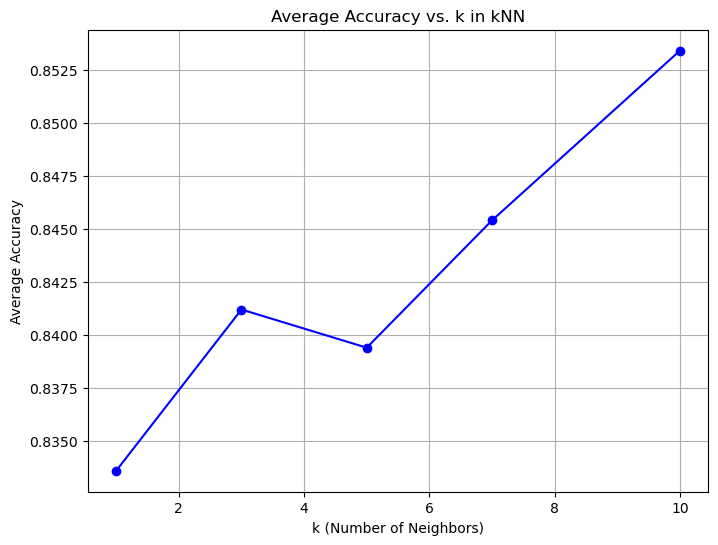

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, average_accuracies, marker='o', linestyle='-', color='b')
plt.title('Average Accuracy vs. k in kNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)

# Print the average accuracy for each k
for i, k in enumerate(k_values):
    print(f'k = {k}: Average Accuracy = {average_accuracies[i]:.4f}')
plt.savefig('/Users/zexuansun/Desktop/CS760/hw3_pic/q4.png',dpi = 200,bbox_inches='tight')
plt.show()

# Q5

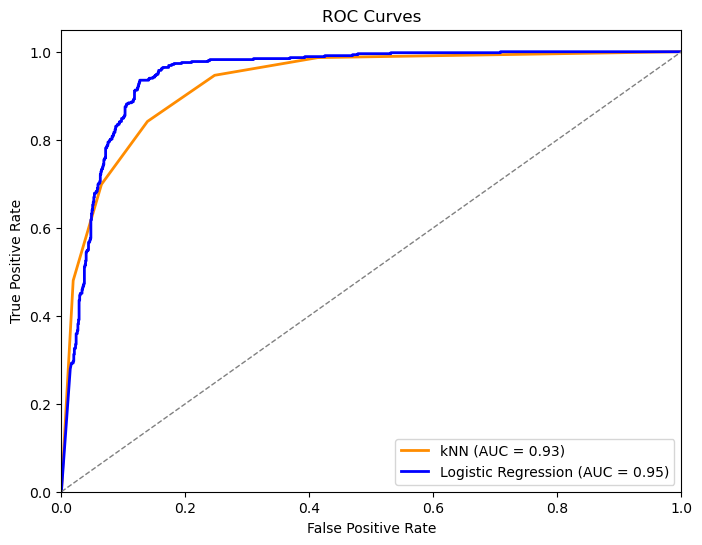

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score, auc

# Generate a synthetic dataset for illustration (Replace with your actual data)
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into a training set and a test set (you can replace this with your actual split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a kNN classifier with k=5
knn_classifier = KNNClassifier(5)
knn_classifier.fit(X_train, y_train)

# Train a logistic regression classifier
logistic_regression =  LogisticRegression(learning_rate=0.01, num_iterations=800)
logistic_regression.fit(X_train, y_train)

# Predict probabilities for both classifiers on the test set
knn_probs = knn_classifier.predict(X_test,prob=True)
_,logistic_probs = logistic_regression.predict(X_test,prob= True)

# Compute ROC curve and AUC for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute ROC curve and AUC for logistic regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.savefig('/Users/zexuansun/Desktop/CS760/hw3_pic/q5.png',dpi = 200,bbox_inches='tight')
plt.show()
